In [990]:
import pandas as pd
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt
import numpy as np
import requests



tables = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi")


df = tables[6]

In [991]:
df.rename(columns={df.columns[0]: "År"}, inplace=True)


df

,År,Medel- folkmängd,Födda,Döda,Naturlig befolknings- förändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolknings- förändring (per 1000),Total fertilitet
0,1900,5 117 000,138 139,86 146,51 993,270.0,168.0,102.0,402.0
1,1901,5 156 000,139 370,82 772,56 598,270.0,161.0,110.0,404.0
2,1902,5 187 000,137 364,79 722,57 642,265.0,154.0,111.0,395.0
3,1903,5 210 000,133 896,78 610,55 286,257.0,151.0,106.0,382.0
4,1904,5 241 000,134 952,80 152,54 800,257.0,153.0,105.0,383.0
...,...,...,...,...,...,...,...,...,...
118,2018,"10 175 213,5",115 832,92 185,23 647,113.0,90.0,23.0,175.0
119,2019,"10 278 887,0",114 523,88 766,28 727,111.0,87.0,24.0,170.0
120,2020,"10 353 442,0",113 077,98 124,14 953,109.0,95.0,14.0,166.0
121,2021,"10 415 810,5",114 263,91 958,22 305,110.0,88.0,22.0,NaN


In [992]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   År                                           123 non-null    int64  
 1   Medel- folkmängd                             123 non-null    object 
 2   Födda                                        123 non-null    object 
 3   Döda                                         123 non-null    object 
 4   Naturlig befolknings- förändring             123 non-null    object 
 5   Nativitet (per 1000)                         122 non-null    float64
 6   Dödstal (per 1000)                           122 non-null    float64
 7   Naturlig befolknings- förändring (per 1000)  122 non-null    float64
 8   Total fertilitet                             121 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 8.8+ KB


In [993]:

df["Medel- folkmängd"] = df["Medel- folkmängd"].str.replace(' ', '').str.replace(r',\d+', '', regex=True).str.strip(" ")
df["Födda"] = df["Födda"].str.replace(' ', '').str.strip()
df["Födda"] = df["Födda"].str.replace(' ', '').str.strip()
df["Döda"] = df["Döda"].str.replace(' ', '').str.strip()
df["Naturlig befolknings- förändring"] = df["Naturlig befolknings- förändring"].str.replace(' ', '').str.strip()

df

,År,Medel- folkmängd,Födda,Döda,Naturlig befolknings- förändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolknings- förändring (per 1000),Total fertilitet
0,1900,5117000,138139,86146,51993,270.0,168.0,102.0,402.0
1,1901,5156000,139370,82772,56598,270.0,161.0,110.0,404.0
2,1902,5187000,137364,79722,57642,265.0,154.0,111.0,395.0
3,1903,5210000,133896,78610,55286,257.0,151.0,106.0,382.0
4,1904,5241000,134952,80152,54800,257.0,153.0,105.0,383.0
...,...,...,...,...,...,...,...,...,...
118,2018,10175213,115832,92185,23647,113.0,90.0,23.0,175.0
119,2019,10278887,114523,88766,28727,111.0,87.0,24.0,170.0
120,2020,10353442,113077,98124,14953,109.0,95.0,14.0,166.0
121,2021,10415810,114263,91958,22305,110.0,88.0,22.0,NaN


In [994]:
df["Medel- folkmängd"] = pd.to_numeric(df["Medel- folkmängd"])
df["Födda"] = pd.to_numeric(df["Födda"])
df["Döda"] =pd.to_numeric(df["Döda"])
df["Naturlig befolknings- förändring"] = pd.to_numeric(df["Naturlig befolknings- förändring"])

df

,År,Medel- folkmängd,Födda,Döda,Naturlig befolknings- förändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolknings- förändring (per 1000),Total fertilitet
0,1900,5117000,138139,86146,51993,270.0,168.0,102.0,402.0
1,1901,5156000,139370,82772,56598,270.0,161.0,110.0,404.0
2,1902,5187000,137364,79722,57642,265.0,154.0,111.0,395.0
3,1903,5210000,133896,78610,55286,257.0,151.0,106.0,382.0
4,1904,5241000,134952,80152,54800,257.0,153.0,105.0,383.0
...,...,...,...,...,...,...,...,...,...
118,2018,10175213,115832,92185,23647,113.0,90.0,23.0,175.0
119,2019,10278887,114523,88766,28727,111.0,87.0,24.0,170.0
120,2020,10353442,113077,98124,14953,109.0,95.0,14.0,166.0
121,2021,10415810,114263,91958,22305,110.0,88.0,22.0,NaN


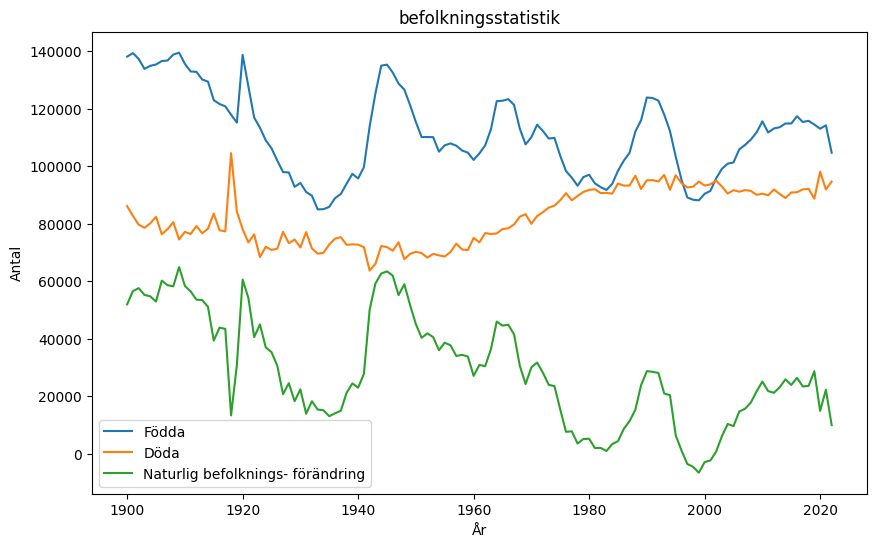

In [995]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="År", y="Födda", label="Födda")
sns.lineplot(data=df, x="År", y="Döda", label="Döda")
sns.lineplot(data=df, x="År", y="Naturlig befolknings- förändring", label="Naturlig befolknings- förändring")
plt.title("befolkningsstatistik")
plt.ylabel("Antal")
plt.legend()
plt.show()

In [996]:

df_before1900 = tables[1]
df_before1900 = df_before1900.iloc[:7, 0:2]

df_before1900.columns = ['År', 'Medel- folkmängd']

df_before1900['Medel- folkmängd'] = df_before1900['Medel- folkmängd'].astype(str)
df_before1900['År'] = df_before1900['År'].astype(str)
df_before1900['Medel- folkmängd'] = df_before1900['Medel- folkmängd'].str.replace(' ', '').str.replace('\xa0', '').astype(int)
df_before1900['År'] = df_before1900['År'].str.replace(' ', '').str.replace('\xa0', '').astype(int)


df_before1900



,År,Medel- folkmängd
0,1570,900000
1,1650,1225000
2,1700,1485000
3,1720,1350000
4,1755,1878000
5,1815,2465000
6,1865,4099000


In [997]:
df = pd.concat([df,df_before1900])

df = df.sort_values(by="År", ascending=False)


<Axes: xlabel='År', ylabel='Folkmängd'>

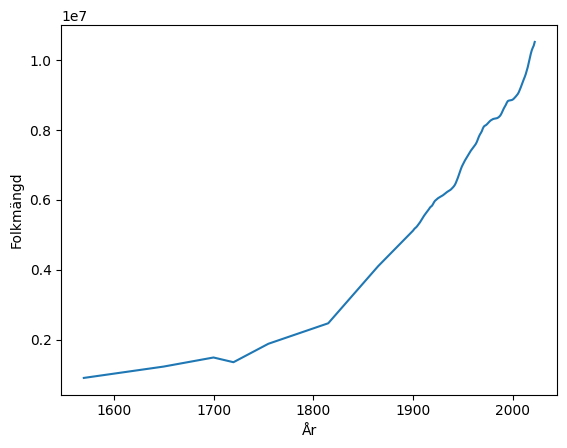

In [998]:
df.rename(columns={df.columns[1]: "Folkmängd"}, inplace=True)
sns.lineplot(data=df, x="År", y="Folkmängd")

<Axes: xlabel='År', ylabel='Döda'>

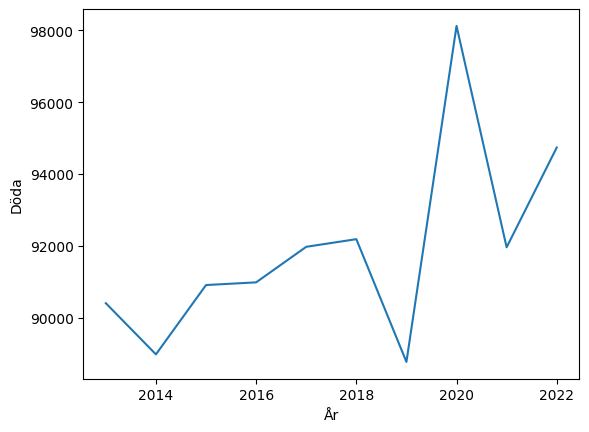

In [999]:

df_covid = df.head(10)
sns.lineplot(data=df_covid, y="Döda", x="År")

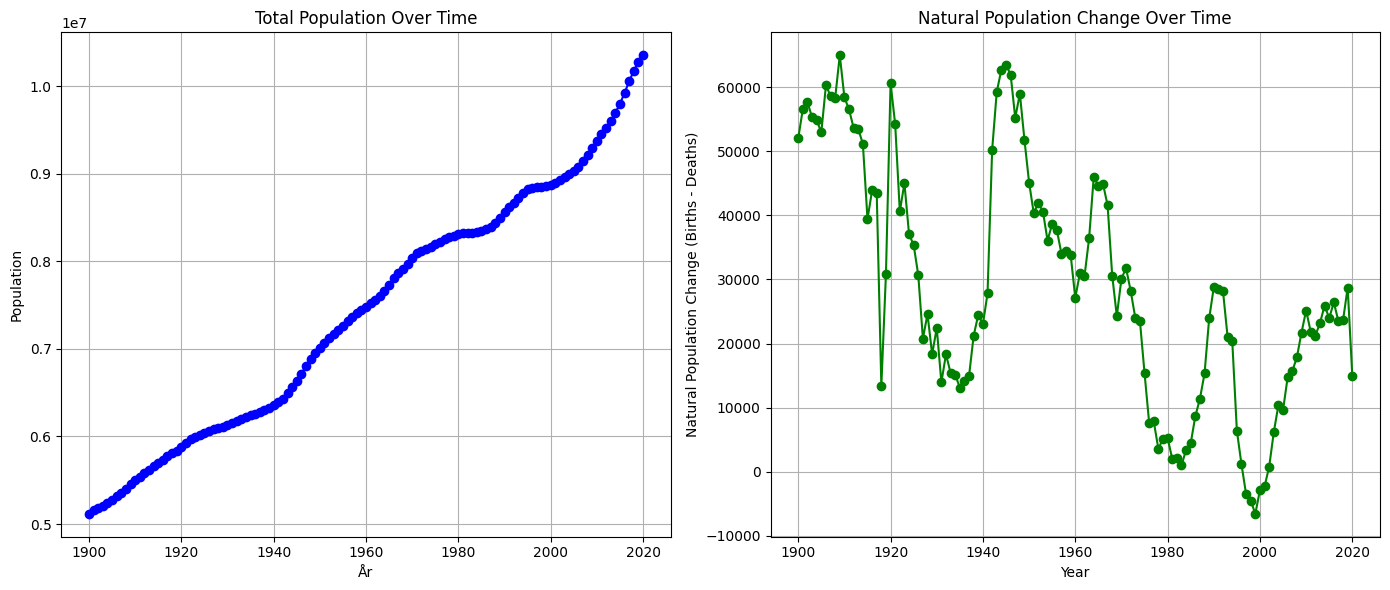

In [1002]:

df = df.dropna()
# Set the figure size
plt.figure(figsize=(14, 6))

# Plotting Total Population
plt.subplot(1, 2, 1)
plt.plot(df['År'], df['Folkmängd'], marker='o', color='b')
plt.title('Total Population Over Time')
plt.xlabel('År')
plt.ylabel('Population')
plt.grid(True)

# Plotting Natural Population Change
plt.subplot(1, 2, 2)
plt.plot(df['År'], df['Naturlig befolknings- förändring'], marker='o', color='g')
plt.title('Natural Population Change Over Time')
plt.xlabel('Year')
plt.ylabel('Natural Population Change (Births - Deaths)')
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()


In [1003]:
denmark_url = "https://da.wikipedia.org/wiki/Danmarks_demografi"
dk_tables = pd.read_html(denmark_url)
df_dk = dk_tables[0]
df_dk = df_dk.dropna()
dk_set1 = df_dk.iloc[:, 0:2]
dk_set2 = df_dk.iloc[:, 2:]

dk_set1.rename(columns={"År": "År", "Befolkning pr. 1. januar": "Befolkning" }, inplace=True)
dk_set2.rename(columns={"År.1": "År", "Befolkning pr. 1. januar.1": "Befolkning" }, inplace=True)


df_dk = pd.concat([dk_set1, dk_set2])
df_dk["År"] = df_dk["År"].astype(str).str.replace('.0', '').str.strip(" ")
df_dk["År"] = df_dk["År"].astype(int)
df_dk["Befolkning"] = df_dk["Befolkning"].astype(str).str.replace('.', '').str.strip(" ")
df_dk["Befolkning"] = df_dk["Befolkning"].astype(int)
df_dk

,År,Befolkning
2,1769,797584
3,1787,841806
4,1801,929001
5,1834,1230964
6,1840,1289075
...,...,...
29,2003,5383507
30,2005,5411405
31,2010,5534738
32,2015,5659715


In [1004]:

fig = px.line(df_dk, x="År", y="Befolkning", hover_name="Befolkning",
        line_shape="spline", render_mode="svg")
fig.show()

In [1005]:
no_url = "https://sv.wikipedia.org/wiki/Norges_demografi"
tables_no = pd.read_html(no_url)
df_no = tables_no[2]

df_no.rename(columns={"Unnamed: 0": "År"}, inplace=True)
df_no

,År,Befolkning i tusentals (x 1000),Födda,Döda,Naturlig förändring,Födelsetal per 1 000 invånare,Dödstal per 1 000 invånare,Naturlig förändring per 1 000 invånare,Total fertilitet
0,1900,2 231,66 229,35 345,30 884,297,158,138,NaN
1,1901,2 255,67 303,33 821,33 482,298,150,148,NaN
2,1902,2 276,66 494,31 670,34 824,292,139,153,NaN
3,1903,2 288,65 470,33 847,31 623,286,148,138,NaN
4,1904,2 298,64 143,32 895,31 248,279,143,136,NaN
...,...,...,...,...,...,...,...,...,...
108,2008,4 768,60 497,41 712,18 785,127,87,39,196.0
109,2009,4 829,61 807,41 449,20 358,128,86,42,198.0
110,2010,4 889,61 442,41 500,19 942,126,85,41,195.0
111,2011,4 953,60 220,41 393,18 827,121,83,38,188.0


In [1006]:
fertility_url = "https://en.wikipedia.org/wiki/Demographics_of_Norway"

fertility_table = pd.read_html(fertility_url)

fertility_df = fertility_table[30]
fertility_data = fertility_df["Total fertility rates[fn 1][6][9]"]
fertility_data_years = fertility_df["Unnamed: 0"]
fertility_df = pd.concat([fertility_data_years,fertility_data], axis=1)
fertility_df.rename(columns={"Unnamed: 0":"År","Total fertility rates[fn 1][6][9]": "Total fertilitet"}, inplace=True)
fertility_df["Total fertilitet"] = fertility_df["Total fertilitet"]*100

fertility_df


,År,Total fertilitet
0,1900,440.0
1,1901,437.0
2,1902,426.0
3,1903,416.0
4,1904,407.0
...,...,...
120,2020,148.0
121,2021,155.0
122,2022,141.0
123,2023,140.0


In [1007]:

merged_df = pd.merge(df_no, fertility_df, left_on='År', right_on='År', how='left')

df_no = merged_df
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   År                                      113 non-null    int64  
 1   Befolkning i tusentals (x 1000)         113 non-null    object 
 2   Födda                                   113 non-null    object 
 3   Döda                                    113 non-null    object 
 4   Naturlig förändring                     113 non-null    object 
 5   Födelsetal per 1 000 invånare           113 non-null    int64  
 6   Dödstal per 1 000 invånare              113 non-null    int64  
 7   Naturlig förändring per 1 000 invånare  113 non-null    int64  
 8   Total fertilitet_x                      85 non-null     float64
 9   Total fertilitet_y                      113 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 9.0+ KB


In [1008]:
df_no['Total fertilitet_x'] = df_no['Total fertilitet_x'].fillna(df_no['Total fertilitet_y'])
df_no = df_no.drop(columns="Total fertilitet_y")
df_no = df_no.rename(columns={"Total fertilitet_x": "Fertilitet", "Befolkning i tusentals (x 1000)": "Folkmängd"})
df_no

,År,Folkmängd,Födda,Döda,Naturlig förändring,Födelsetal per 1 000 invånare,Dödstal per 1 000 invånare,Naturlig förändring per 1 000 invånare,Fertilitet
0,1900,2 231,66 229,35 345,30 884,297,158,138,440.0
1,1901,2 255,67 303,33 821,33 482,298,150,148,437.0
2,1902,2 276,66 494,31 670,34 824,292,139,153,426.0
3,1903,2 288,65 470,33 847,31 623,286,148,138,416.0
4,1904,2 298,64 143,32 895,31 248,279,143,136,407.0
...,...,...,...,...,...,...,...,...,...
108,2008,4 768,60 497,41 712,18 785,127,87,39,196.0
109,2009,4 829,61 807,41 449,20 358,128,86,42,198.0
110,2010,4 889,61 442,41 500,19 942,126,85,41,195.0
111,2011,4 953,60 220,41 393,18 827,121,83,38,188.0


<Axes: xlabel='År', ylabel='Fertilitet'>

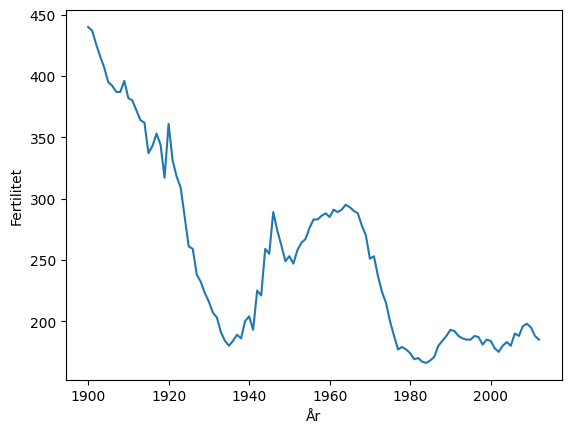

In [1009]:
sns.lineplot(data=df_no, x="År", y="Fertilitet")



In [1010]:
df_no_slice = df_no[["År","Folkmängd", "Fertilitet"]]
df_no_slice["Folkmängd"] = pd.to_numeric(df_no_slice["Folkmängd"].str.replace(" ", ""))
df_no_slice.loc[0:,"Folkmängd"] = df_no_slice.loc[0:, "Folkmängd"]*1000
df_no_slice = df_no_slice.rename(columns={"Folkmängd": "Folkmängd (NO)", "Fertilitet": "Fertilitet (NO)"})
df_no_slice

/var/folders/f9/0ycsbjtd5ygdwxd1cn_bk5qw0000gn/T/ipykernel_38549/3936021718.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,År,Folkmängd (NO),Fertilitet (NO)
0,1900,2231000,440.0
1,1901,2255000,437.0
2,1902,2276000,426.0
3,1903,2288000,416.0
4,1904,2298000,407.0
...,...,...,...
108,2008,4768000,196.0
109,2009,4829000,198.0
110,2010,4889000,195.0
111,2011,4953000,188.0


In [1011]:
df_swe_slice = df[["År","Folkmängd", "Total fertilitet"]]
df_swe_slice = df_swe_slice.rename(columns={"Folkmängd": "Folkmängd (SE)", "Total fertilitet": "Fertilitet (SE)"})
df_swe_slice

df_se_no_merge = pd.merge(df_swe_slice,df_no_slice)
df_se_no_merge

,År,Folkmängd (SE),Fertilitet (SE),Folkmängd (NO),Fertilitet (NO)
0,2012,9519374,191.0,5019000,185.0
1,2011,9449212,190.0,4953000,188.0
2,2010,9378126,198.0,4889000,195.0
3,2009,9298514,194.0,4829000,198.0
4,2008,9219637,191.0,4768000,196.0
...,...,...,...,...,...
108,1904,5241000,383.0,2298000,407.0
109,1903,5210000,382.0,2288000,416.0
110,1902,5187000,395.0,2276000,426.0
111,1901,5156000,404.0,2255000,437.0


In [1012]:
px.line(data_frame=df_se_no_merge, x="År", y=["Fertilitet (NO)","Fertilitet (SE)"])


In [1013]:
px.line(data_frame=df_se_no_merge, x="År", y=["Folkmängd (NO)","Folkmängd (SE)"])